In [1]:
import hkvfewspy as hkv
import pandas as pd
%matplotlib inline
hkv.__version__

'0.6.0'

In [2]:
# define object
pi = hkv.Pi()

In [3]:
# create empty PI-TimeSeries object
pi_ts = pi.setPiTimeSeries(prefill_defaults=False)

In [4]:
s = pd.Series(data=pd.np.random.randint(0,100, size=(5)), 
              index=pd.date_range(start='2018-01-01', periods=5, freq='D'),
              name='value')

In [5]:
s.head()

2018-01-01    78
2018-01-02    49
2018-01-03    21
2018-01-04    93
2018-01-05    21
Freq: D, Name: value, dtype: int32

In [6]:
# set two root objects
pi_ts.write.root.timeZone('gmt')
pi_ts.write.root.version('1.22')
pi_ts.write.root.geoDatum('WGS 1984')

# set comment
pi_ts.write.comment('this is an comment')

# set a header object
pi_ts.write.header.timeSeriesType("instantaneous")
pi_ts.write.header.moduleInstanceId('my_little_moduleinstanceID')
pi_ts.write.header.locationId('my_little_locationID')
pi_ts.write.header.parameterId('my_little_parameterID')
pi_ts.write.header.timeStep(unit="day")
pi_ts.write.header.startDate(date='2018-01-01', time='00:00:00')
pi_ts.write.header.endDate(date='2018-01-05', time='00:00:00')
pi_ts.write.header.missVal(pd.np.nan)
pi_ts.write.header.longName('my_longname_locationID')
pi_ts.write.header.units('m/3')

# set a events object (pandas.Series or pandas.DataFrame)
pi_ts.write.events(s)

In [7]:
pi_ts.view

{'timeZone': 'gmt',
 'version': '1.22',
 'geoDatum': 'WGS 1984',
 'timeSeries': [{'comment': 'this is an comment',
   'header': {'type': 'instantaneous',
    'moduleInstanceId': 'my_little_moduleinstanceID',
    'locationId': 'my_little_locationID',
    'parameterId': 'my_little_parameterID',
    'timeStep': {'unit': 'day', 'divider': 1, 'multiplier': 1},
    'startDate': {'date': '2018-01-01', 'time': '00:00:00'},
    'endDate': {'date': '2018-01-05', 'time': '00:00:00'},
    'missVal': nan,
    'longName': 'my_longname_locationID',
    'units': 'm/3'},
   'events':             value
   datetime         
   2018-01-01     78
   2018-01-02     49
   2018-01-03     21
   2018-01-04     93
   2018-01-05     21}]}

In [8]:
pi_ts.view['timeSeries'][0]['events'].head() # pandas.DataFrame

,value
datetime,
2018-01-01,78
2018-01-02,49
2018-01-03,21
2018-01-04,93
2018-01-05,21


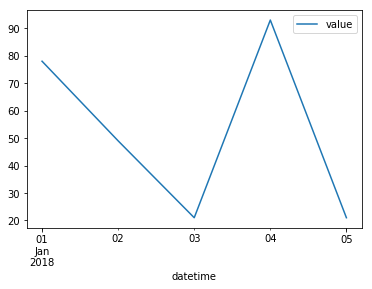

In [9]:
pi_ts.view['timeSeries'][0]['events'].plot()

In [10]:
# show resulted PI-JSON object
print(pi_ts.to.pi_json())

{
    "geoDatum": "WGS 1984",
    "timeSeries": [
        {
            "comment": "this is an comment",
            "events": [
                {
                    "date": "2018-01-01",
                    "time": "00:00:00",
                    "value": 78
                },
                {
                    "date": "2018-01-02",
                    "time": "00:00:00",
                    "value": 49
                },
                {
                    "date": "2018-01-03",
                    "time": "00:00:00",
                    "value": 21
                },
                {
                    "date": "2018-01-04",
                    "time": "00:00:00",
                    "value": 93
                },
                {
                    "date": "2018-01-05",
                    "time": "00:00:00",
                    "value": 21
                }
            ],
            "header": {
                "endDate": {
                    "date": "2018-01-05",
       

In [11]:
# show resulted PI-XML object
print(pi_ts.to.pi_xml())

<?xml version="1.0" ?>
<TimeSeries version="1.22" xmlns="http://www.wldelft.nl/fews/PI" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.wldelft.nl/fews/PI http://fews.wldelft.nl/schemas/version1.0/pi-schemas/pi_timeseries.xsd">
  <timeZone>gmt</timeZone>
  <geoDatum>WGS 1984</geoDatum>
  <series>
    <comment>this is an comment</comment>
    <header>
      <type>instantaneous</type>
      <moduleInstanceId>my_little_moduleinstanceID</moduleInstanceId>
      <locationId>my_little_locationID</locationId>
      <parameterId>my_little_parameterID</parameterId>
      <timeStep date="day" divider="1"/>
      <startDate date="2018-01-01" time="00:00:00"/>
      <endDate date="2018-01-05" time="00:00:00"/>
      <missVal>nan</missVal>
      <longName>my_longname_locationID</longName>
      <units>m/3</units>
    </header>
    <properties/>
    <events date="2018-01-01" time="00:00:00" value="78"/>
    <events date="2018-01-02" time="00:00:00" value="49"/>
 

In [12]:
# write pandas.DataFrame
df = pd.DataFrame(data=pd.np.random.randint(0, 100, size=(5,3)), 
                  index=pd.date_range(start='2018-01-01', periods=5, freq='D'),
                  columns=['value', 'flag', 'invalid_column_name'])

In [13]:
df.head()

,value,flag,invalid_column_name
2018-01-01,95,16,8
2018-01-02,18,4,63
2018-01-03,93,21,86
2018-01-04,71,88,0
2018-01-05,47,23,96


In [14]:
# parse pandas.DataFrame as events
pi_ts.write.events(df)

 Only the following column names are accepted: 'value', 'minValue', 'maxValue', 'flag', 'flagSource', 'comment', 'user''


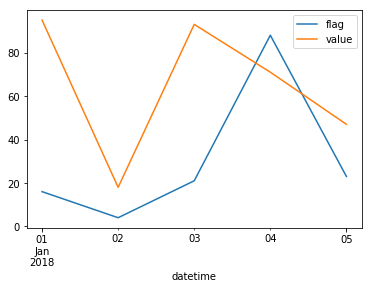

In [15]:
pi_ts.view['timeSeries'][0]['events'].plot()

In [16]:
# show resulted PI-JSON object
print(pi_ts.to.pi_json())

{
    "geoDatum": "WGS 1984",
    "timeSeries": [
        {
            "comment": "this is an comment",
            "events": [
                {
                    "date": "2018-01-01",
                    "flag": 16,
                    "time": "00:00:00",
                    "value": 95
                },
                {
                    "date": "2018-01-02",
                    "flag": 4,
                    "time": "00:00:00",
                    "value": 18
                },
                {
                    "date": "2018-01-03",
                    "flag": 21,
                    "time": "00:00:00",
                    "value": 93
                },
                {
                    "date": "2018-01-04",
                    "flag": 88,
                    "time": "00:00:00",
                    "value": 71
                },
                {
                    "date": "2018-01-05",
                    "flag": 23,
                    "time": "00:00:00",
        

In [17]:
# show resulted PI-XML object
print(pi_ts.to.pi_xml())

<?xml version="1.0" ?>
<TimeSeries version="1.22" xmlns="http://www.wldelft.nl/fews/PI" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.wldelft.nl/fews/PI http://fews.wldelft.nl/schemas/version1.0/pi-schemas/pi_timeseries.xsd">
  <timeZone>gmt</timeZone>
  <geoDatum>WGS 1984</geoDatum>
  <series>
    <comment>this is an comment</comment>
    <header>
      <type>instantaneous</type>
      <moduleInstanceId>my_little_moduleinstanceID</moduleInstanceId>
      <locationId>my_little_locationID</locationId>
      <parameterId>my_little_parameterID</parameterId>
      <timeStep date="day" divider="1"/>
      <startDate date="2018-01-01" time="00:00:00"/>
      <endDate date="2018-01-05" time="00:00:00"/>
      <missVal>nan</missVal>
      <longName>my_longname_locationID</longName>
      <units>m/3</units>
    </header>
    <properties/>
    <events date="2018-01-01" flag="16" time="00:00:00" value="95"/>
    <events date="2018-01-02" flag="4" time="00:00